In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [2]:
mp_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [5]:
ingu_var = [x for x in mp_df.columns if '_ingu' in x]

In [6]:
mp_df_2 = pd.melt(mp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구
0,0,마포구,아현동,under10_ingu,0.930341
1,0,마포구,아현동,under10_ingu,0.439934
2,0,마포구,아현동,under10_ingu,1.186017
3,0,마포구,아현동,under10_ingu,0.040449
4,0,마포구,아현동,under10_ingu,1.422992


In [7]:
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,마포구,아현동,under10_ingu,0.930341,under10,ingu
1,0,마포구,아현동,under10_ingu,0.439934,under10,ingu
2,0,마포구,아현동,under10_ingu,1.186017,under10,ingu
3,0,마포구,아현동,under10_ingu,0.040449,under10,ingu
4,0,마포구,아현동,under10_ingu,1.422992,under10,ingu


In [8]:
mp_df_2_temp = mp_df_2[mp_df_2['성별']=='ingu'].groupby('연령대').sum()
mp_df_2_temp['남성'] = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
mp_df_2_temp['여성'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

In [9]:
mp_df_2_temp['남녀합'] = mp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
mp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

,남성,여성,남녀합,인구
연령대,,,,
under10,21150.163555,25420.854306,46571.017861,46571.017861
under20,164446.999346,182409.680518,346856.679864,346856.679864
under30,399642.226989,482564.410994,882206.637982,882206.637982
under40,471511.111013,455532.456175,927043.567189,927043.567189
under50,452703.165684,436499.256046,889202.421730,889202.421730
under60,346064.255209,347563.469004,693627.724213,693627.724213
under70,228068.059016,248618.542811,476686.601827,476686.601827
under80,117487.081238,135079.248804,252566.330041,252566.330041
upper80,33397.618981,41111.222892,74508.841873,356251.288817


In [10]:
mp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [11]:
mp_df_2['연령대'].unique()

array(['under10', 'under20', 'under30', 'under40', 'under50', 'under60',
       'under70', 'under80', 'upper80'], dtype=object)

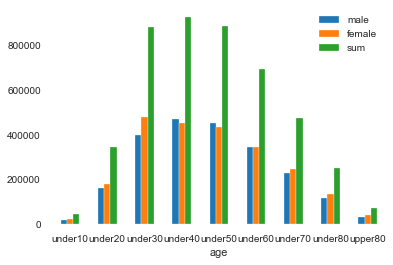

In [12]:
analysis_age = mp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = mp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_mp.png')

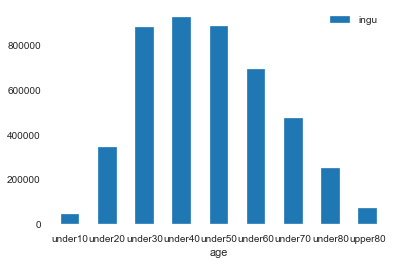

In [17]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_mp_total.png')

In [12]:
mp_df_2 = mp_df_2[mp_df_2['성별']!='ingu']
analysis_time = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,86656.824118,90183.903966,176840.728083
1,84987.109013,89264.517595,174251.626607
2,83824.045373,88690.380360,172514.425733
3,82889.797315,88117.542113,171007.339428
4,82179.730119,87523.564664,169703.294783
5,82982.473957,87421.513143,170403.987100
6,84496.595797,88043.438832,172540.034629
7,87360.664704,90678.165371,178038.830075
8,90590.865919,96026.846648,186617.712568


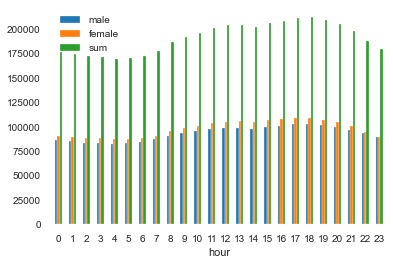

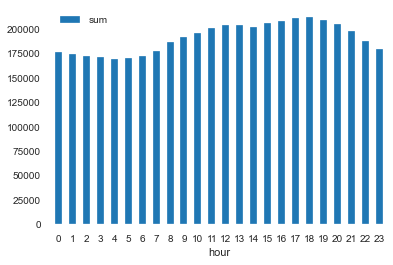

In [20]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_mp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_mp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [12]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

['under10_male_ingu', 'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu', 'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu', 'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']
['under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']


In [13]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
mp_df_3 = mp_df.loc[:,['hour','gu_name','dong_name']]
mp_df_3_male = mp_df_3.copy()
mp_df_3_female = mp_df_3.copy()
for idx,_var in enumerate(new_ingu_var):
    mp_df_3[_var] = mp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)
    mp_df_3_male[_var] = mp_df[male_ingu_var[idx]]
    mp_df_3_female[_var] = mp_df[female_ingu_var[idx]]
mp_df_3_female

,hour,gu_name,dong_name,under10,under20,under30,under40,under50,under60,under70,under80,upper80
0,0,마포구,아현동,0.564998,1.903639,2.923375,6.037999,4.820747,4.610593,2.838935,0.988412,0.334515
1,0,마포구,아현동,0.194389,0.937367,2.126201,3.282374,2.270988,2.072884,2.470374,0.789706,0.213145
2,0,마포구,아현동,0.610333,2.640932,4.626453,9.586080,6.959180,7.573941,4.303477,2.265397,0.587305
3,0,마포구,아현동,0.022664,0.466241,0.855782,1.313806,0.989963,1.003293,0.545880,0.265390,0.077489
4,0,마포구,아현동,0.842726,3.400646,4.968618,11.432560,7.189135,8.075150,3.850353,1.835608,0.549342
...,...,...,...,...,...,...,...,...,...,...,...,...
195297,23,마포구,상암동,0.431484,1.550629,0.817472,1.030094,2.333632,0.859522,0.627929,0.405256,0.184592
195298,23,마포구,상암동,0.008153,0.030641,0.352194,0.189990,0.131467,0.093452,0.105257,0.042356,0.015036
195299,23,마포구,상암동,0.000681,0.000681,0.002220,0.002901,0.003079,0.004100,0.000681,0.000000,0.000000
195300,23,마포구,상암동,0.004952,0.023341,0.024783,0.028472,0.047619,0.022991,0.025804,0.014376,0.003966


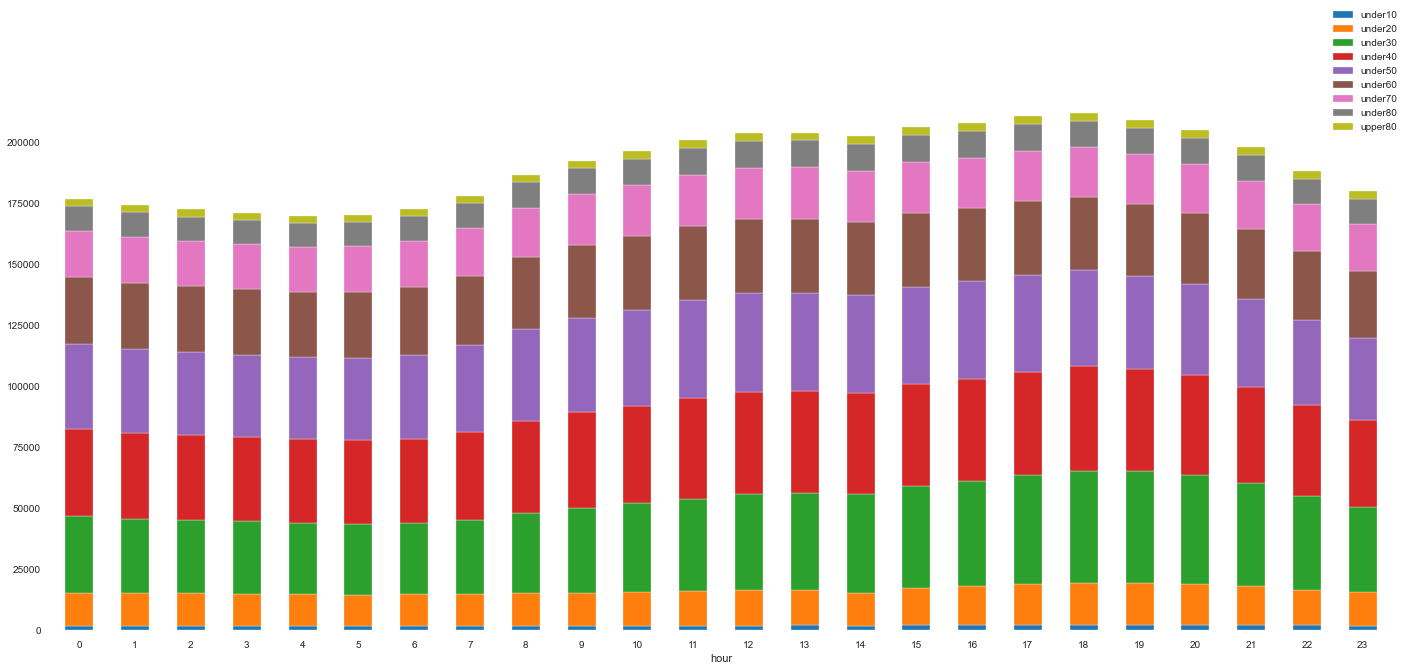

In [14]:
analysis_time_stack = mp_df_3.groupby('hour').sum()
analysis_time_stack2 = analysis_time_stack.copy()
analysis_time_stack2['hour'] = mp_df_3['hour'].unique()
ax4 = analysis_time_stack2.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.95, 0.9)) 
# plt.savefig('analysis_time_mp_total_wrt_age2.png')

analysis_time_stack_male = mp_df_3_male.groupby('hour').sum()
analysis_time_stack_female = mp_df_3_female.groupby('hour').sum()

### 시간대별 연령대 인구수 히트맵 그리기

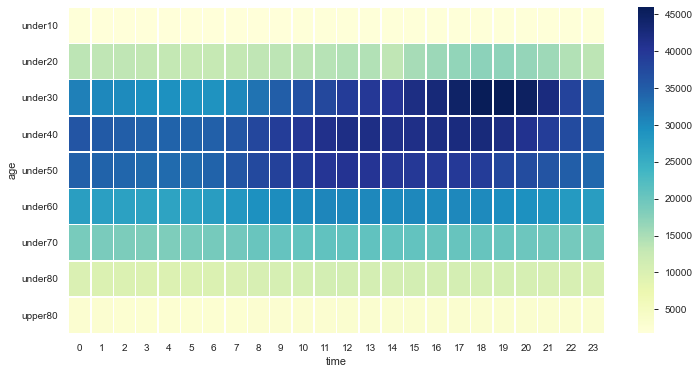

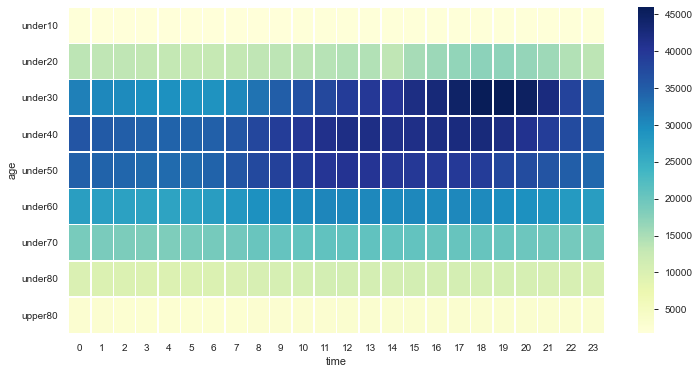

In [15]:
analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

# sns_fig.savefig('time_age_population_mp.png')


analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap_male = analysis_time_stack_male.transpose()
analysis_time_stack_heatmap_female = analysis_time_stack_female.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

# sns_fig.savefig('time_age_population_mp.png')

### 유출입 인구수 파악을 위해 거주지 인구수와의 차이를 가시화

In [18]:
analysis_time_heatmap_wrt4 = analysis_time_stack_heatmap.copy()
analysis_time_heatmap_male_wrt4 = analysis_time_stack_heatmap_male.copy()
analysis_time_heatmap_female_wrt4 = analysis_time_stack_heatmap_female.copy()
annot_male_percent = analysis_time_heatmap_wrt4.copy()

for idx in range(24):
    analysis_time_heatmap_wrt4[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[4]
    analysis_time_heatmap_male_wrt4[idx] = analysis_time_stack_heatmap_male[idx]-analysis_time_stack_heatmap_male[4]
    analysis_time_heatmap_female_wrt4[idx] = analysis_time_stack_heatmap_female[idx]-analysis_time_stack_heatmap_female[4]

    annot_male_percent[idx] = analysis_time_heatmap_male_wrt4[idx].abs()/(analysis_time_heatmap_male_wrt4[idx].abs()+analysis_time_heatmap_female_wrt4[idx].abs())
annot_male_percent[4] = analysis_time_stack_heatmap_male[4]/analysis_time_stack_heatmap[4]
# annot_male_percent
analysis_time_heatmap_wrt4

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
under10,168.141171,134.095214,98.867391,58.404096,0.0,-7.142173,-17.788049,27.522385,132.075930,147.251759,...,185.909077,265.742388,296.524343,324.635430,326.456912,308.786704,298.816360,250.350334,214.247032,163.817186
under20,498.955391,396.156470,295.192014,172.011384,0.0,-166.149327,-127.056363,28.259215,363.879919,500.606269,...,443.402815,2239.671705,3198.443510,3901.790516,4355.627913,4204.492939,3691.863545,2996.359589,1419.673130,610.337536
under30,1872.647514,1015.138500,623.016320,216.044450,0.0,-229.726297,-221.179846,953.633728,3260.039618,5468.138082,...,11101.411731,12582.012605,13704.105831,15161.485555,16585.685794,16649.313019,15709.974978,13091.358900,9154.473131,5555.469435
under40,1681.709482,1030.300227,559.159381,269.017264,0.0,19.842932,442.946939,1655.797898,3690.419213,4918.250840,...,7075.472438,7249.494995,7554.538163,8213.319215,8562.984138,7584.593289,6576.130316,4929.708213,3191.718612,1324.808273
under50,1290.655101,871.612961,478.389793,275.972534,0.0,125.849916,974.020435,2456.882800,4251.425883,5273.467230,...,6588.433789,6494.866889,6378.417690,6283.999735,5832.622843,4458.317129,3760.864832,2731.364422,1466.214142,346.610706
under60,704.298505,419.248974,264.757418,209.881799,0.0,377.664803,890.204398,1629.560277,2503.703468,3110.421150,...,3434.900815,3623.273712,3459.148678,3552.515274,3387.537726,2862.682187,2537.952399,2008.665784,1284.075929,750.500454
under70,456.915979,379.669397,242.610546,51.053139,0.0,445.129603,701.053914,1106.892657,1846.629463,2215.046994,...,2359.432795,2333.529817,2090.010920,2118.214417,2004.529261,1922.071645,1490.642497,1150.032600,913.458864,624.450881
under80,311.109218,205.772715,174.003816,29.801181,0.0,124.905684,180.772284,433.001407,749.351209,907.367628,...,1207.538087,1357.112846,1205.863489,1266.964964,1052.825483,957.325278,813.726478,717.944026,624.593127,528.789600
upper80,153.000938,96.337367,75.134272,21.858797,0.0,10.317176,13.766135,43.984926,116.893081,153.731423,...,346.630597,355.770689,391.209405,407.252567,400.460262,388.195164,388.496094,366.315424,302.712460,266.282137


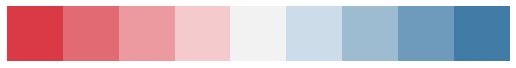

In [20]:
cmap  = sns.diverging_palette(10, 240, sep=20, n=9)
sns.palplot(cmap)


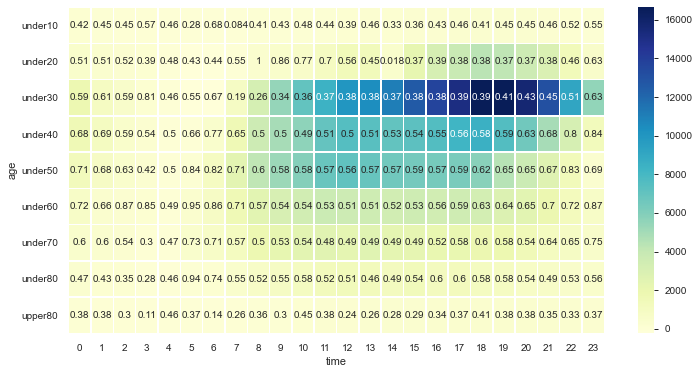

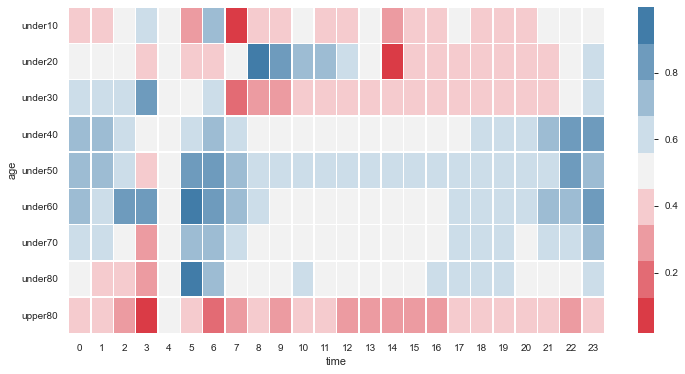

In [21]:
analysis_time_heatmap_wrt4.describe()
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt4,annot=annot_male_percent,
                     cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt4_annot.png')

plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent, cmap=cmap,linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt4_annot_sex.png')

## 성별 정보를 추가로 가시화하기 위한 작업
1. 남성 비율을 수치로 표현
2. 성비율에 따른 히트맵을 추가로 작성

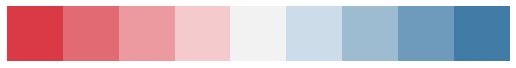

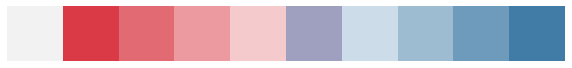

In [24]:
cmap0  = sns.diverging_palette(10, 240, sep=20, n=9)
sns.palplot(cmap0)

cmap  = sns.diverging_palette(10, 240, sep=20, n=9)
cmap = [np.array([0.95,0.95,0.95,1.])] + cmap 
cmap[5] = np.array([0.25,0.25,0.5,0.5])
sns.palplot(cmap)

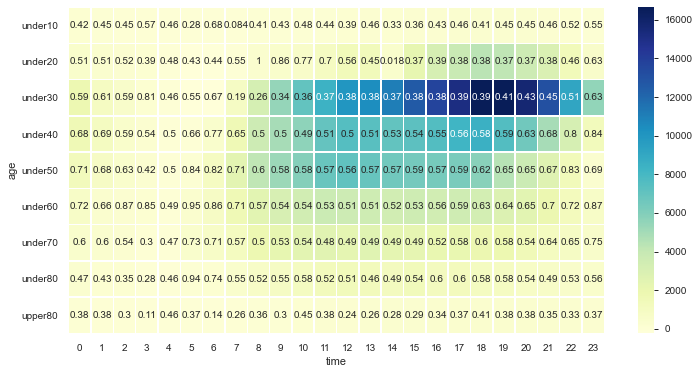

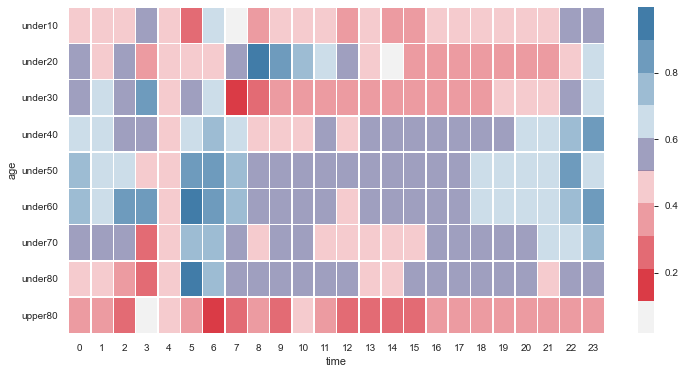

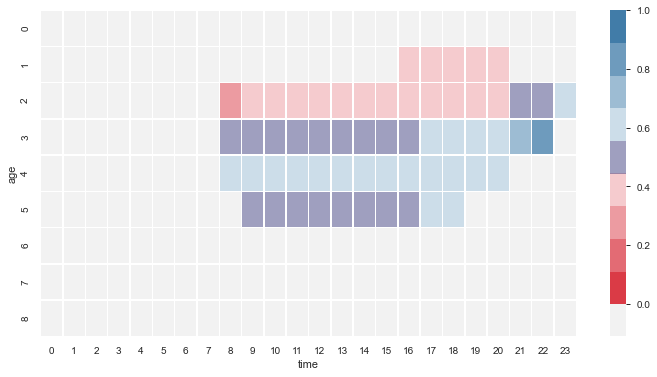

In [25]:
analysis_time_heatmap_wrt4.describe()
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt4,annot=annot_male_percent,
                     cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_yp_wrt4_annot.png')

plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent, cmap=cmap,linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_yp_wrt4_annot_sex.png')

annot_male_percent_select = np.where(analysis_time_heatmap_wrt4>3000,annot_male_percent,-0.11)
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent_select,cmap=cmap, linewidths=.5,vmax=1.)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_yp_wrt4_annot_sex_select3000.png')